In [54]:
##### IMPORTS AND DEFINITIONS #####
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math
import shelve
import numpy as np
import copy

def dip(db,method,n):
    """
    Grabs the scf_dipole tensor and returns its norm
    """
    tens = copy.deepcopy(db[method][n]['scf_dipole']['scf_dipole'])
    tens = np.asarray(tens)
    dip = np.linalg.norm(tens)
    return dip

def find_max_time(db, method, n, time):
    """
    Finds the longest-running job and returns it
    """
    times = []
    for job in db[method][n][time]['raw_data']:
        times.append(db[method][n][time]['raw_data'][job][0])
    return max(times)

def num_jobs(db, method, n, time):
    """
    Returns number of jobs for a given body
    """
    return len(db[method][n][time]['raw_data'])

dif_needed = False
if dif_needed: # this is experimental, need to make it a function to take the difference between MBE and SSFC data
    dif = []
    for omega in range(0,n_omega):
        dif.append([])
        for i in range(1,max_n+1):
            dif[omega].append(abs_frag_ssfc_body_rot_list[omega][i-1] - abs_frag_body_rot_list[omega][i-1])

In [55]:
##### PARAMETERS #####
# Fill in method, basis, short/long names for molecule, number of solvent molecules, and number of omega values #
method = "cam-b3lyp"
basis = "adz"
#basis = "atz"
molecule = "metthi"
full_mol = "methylthiirane" # Used for graph names
n_solv = "6"
n_omega = 4

In [56]:
##### HARVEST OPTIONS #####
# Mark the data types you would like to harvest and graph #
# Everything after this cell should be automatic #
energy = True
dipole = True
polarizability = False
rotation = True
solute_rotation = True

In [57]:
##### VARIABLE SETUP #####
#mbe_name = method + "_" + basis + "_mbe_" + molecule + "_" + n_solv
#ssfc_name = method + "_" + basis + "_ssfc_" + molecule + "_" + n_solv
#mbe_db = shelve.open(mbe_name)
#ssfc_db = shelve.open(ssfc_name)
mbe_db = shelve.open('database')
ssfc_db = shelve.open('ssfc/database')
max_n = int(n_solv) + 1
body_list = list(range(1,max_n+1))
omega_list = mbe_db['omega']
color_list = ['r-s','b-^','g-v','c-o']

In [58]:
##### GRAB ENERGY DATA #####
if energy:
    real_E = mbe_db[method][max_n]['scf_energy']['scf_energy'][0]
    real_ssfc_E = ssfc_db[method][max_n]['scf_energy']['scf_energy'][0]

    energy_list = []
    for n in range(1,max_n+1):
        energy_list.append(mbe_db[method][n]['scf_energy']['scf_energy'][0])
    energy_error_list = []
    for n in range(1,max_n+1):
        energy_error_list.append((energy_list[n-1] - real_E)/real_E*100)
    
    ssfc_energy_list = []
    for n in range(1,max_n+1):
        ssfc_energy_list.append(ssfc_db[method][n]['scf_energy']['scf_energy'][0])
    ssfc_energy_error_list = []
    for n in range(1,max_n+1):
        ssfc_energy_error_list.append((ssfc_energy_list[n-1] - real_ssfc_E)/real_ssfc_E*100)

In [59]:
##### GRAB DIPOLE DATA #####
if dipole:
    real_dip = dip(mbe_db,method,max_n)
    real_ssfc_dip = dip(ssfc_db,method,max_n)

    dip_list = []
    for n in range(1,max_n+1):
        dip_list.append(dip(mbe_db,method,n))
    dip_error_list = []
    for n in range(1,max_n+1):
        dip_error_list.append((dip_list[n-1] - real_dip)/real_dip*100)
    
    ssfc_dip_list = []
    for n in range(1,max_n+1):
        ssfc_dip_list.append(dip(ssfc_db,method,n))
    ssfc_dip_error_list = []
    for n in range(1,max_n+1):
        ssfc_dip_error_list.append((ssfc_dip_list[n-1] - real_ssfc_dip)/real_ssfc_dip*100)

In [60]:
##### GRAB POLARIZABILITY DATA #####
if polarizability:
    tot_real_val = mbe_db[method][max_n]['polarizability']['polarizability'] # CANONICAL RESULTS FOR MBE
    print(tot_real_val)
    tot_real_ssfc_val = ssfc_db[method][max_n]['polarizability']['polarizability'] # CANONICAL RESULTS FOR SSFC

    tot_pol_list = []
    for omega in range(0,n_omega):
        tot_pol_list.append([])
        for n in range(1,max_n+1):
            tot_pol_list[omega].append(mbe_db[method][n]['polarizability']['polarizability'][omega])
        
    tot_error_list = []
    for omega in range(0,n_omega):
        tot_error_list.append([])
        for n in range(1,max_n+1):
            tot_error_list[omega].append((tot_pol_list[omega][n-1] - tot_real_val[omega])/tot_real_val[omega]*100)

    tot_ssfc_pol_list = []
    for omega in range(0,n_omega):
        tot_ssfc_pol_list.append([])
        for n in range(1,max_n+1):
            tot_ssfc_pol_list[omega].append(ssfc_db[method][n]['polarizability']['polarizability'][omega])

    tot_ssfc_error_list = []
    for omega in range(0,n_omega):
        tot_ssfc_error_list.append([])
        for n in range(1,max_n+1):
            tot_ssfc_error_list[omega].append((tot_ssfc_pol_list[omega][n-1] - tot_real_ssfc_val[omega])/tot_real_ssfc_val[omega]*100)

In [61]:
##### GRAB ROTATION DATA #####
if rotation:
    tot_real_val = mbe_db[method][max_n]['rotation']['rotation'] # CANONICAL RESULTS FOR MBE
    print(tot_real_val)
    tot_real_ssfc_val = ssfc_db[method][max_n]['rotation']['rotation'] # CANONICAL RESULTS FOR SSFC

    tot_rot_list = []
    for omega in range(0,n_omega):
        tot_rot_list.append([])
        for n in range(1,max_n+1):
            tot_rot_list[omega].append(mbe_db[method][n]['rotation']['rotation'][omega])
        
    tot_error_list = []
    for omega in range(0,n_omega):
        tot_error_list.append([])
        for n in range(1,max_n+1):
            tot_error_list[omega].append((tot_rot_list[omega][n-1] - tot_real_val[omega])/tot_real_val[omega]*100)

    tot_ssfc_rot_list = []
    for omega in range(0,n_omega):
        tot_ssfc_rot_list.append([])
        for n in range(1,max_n+1):
            tot_ssfc_rot_list[omega].append(ssfc_db[method][n]['rotation']['rotation'][omega])

    tot_ssfc_error_list = []
    for omega in range(0,n_omega):
        tot_ssfc_error_list.append([])
        for n in range(1,max_n+1):
            tot_ssfc_error_list[omega].append((tot_ssfc_rot_list[omega][n-1] - tot_real_ssfc_val[omega])/tot_real_ssfc_val[omega]*100)

[244.92273028364954, 281.33483235720439, 164.41810201219366, 142.33746422199746]


In [62]:
##### GRAB SOLUTE ROTATION DATA #####
if solute_rotation:
    slt_tot_rot_list = []
    for omega in range(0,n_omega):
        slt_tot_rot_list.append([])
        for n in range(1,max_n+1):
            slt_tot_rot_list[omega].append(mbe_db[method][n]['solute_rotation']['solute_rotation'][omega])

    slt_tot_error_list = []
    for omega in range(0,n_omega):
        slt_tot_error_list.append([])
        for n in range(1,max_n+1):
            slt_tot_error_list[omega].append((slt_tot_rot_list[omega][n-1] - tot_real_val[omega])/tot_real_val[omega]*100)

    slt_tot_ssfc_rot_list = []
    for omega in range(0,n_omega):
        slt_tot_ssfc_rot_list.append([])
        for n in range(1,max_n+1):
            slt_tot_ssfc_rot_list[omega].append(ssfc_db[method][n]['solute_rotation']['solute_rotation'][omega])

    slt_tot_ssfc_error_list = []
    for omega in range(0,n_omega):
        slt_tot_ssfc_error_list.append([])
        for n in range(1,max_n+1):
            slt_tot_ssfc_error_list[omega].append((slt_tot_ssfc_rot_list[omega][n-1] - tot_real_ssfc_val[omega])/tot_real_ssfc_val[omega]*100)

In [63]:
##### GRAB BY-ORDER DATA #####
if energy:
    abs_body_energy_list = []
    for n in range(1,max_n+1):
        abs_body_energy_list.append(mbe_db[method][n]['scf_energy']['correction'][0])
        
        
if polarizability:
    abs_body_pol_list = []
    for omega in range(0,n_omega):
        abs_body_pol_list.append([])
        for n in range(1,max_n+1):
            abs_body_pol_list[omega].append(mbe_db[method][n]['polarizability']['correction'][omega])


if rotation:
    abs_body_rot_list = []
    for omega in range(0,n_omega):
        abs_body_rot_list.append([])
        for n in range(1,max_n+1):
            abs_body_rot_list[omega].append(mbe_db[method][n]['rotation']['correction'][omega])

if solute_rotation:
    abs_frag_body_rot_list = []
    for omega in range(0,n_omega):
        abs_frag_body_rot_list.append([])
        for n in range(1,max_n+1):
            abs_frag_body_rot_list[omega].append(mbe_db[method][n]['solute_rotation']['correction'][omega])

if rotation:
    abs_ssfc_body_rot_list = []
    for omega in range(0,n_omega):
        abs_ssfc_body_rot_list.append([])
        for n in range(1,max_n+1):
            abs_ssfc_body_rot_list[omega].append(ssfc_db[method][n]['rotation']['correction'][omega])
     
if solute_rotation:
    abs_frag_ssfc_body_rot_list = []
    for omega in range(0,n_omega):
        abs_frag_ssfc_body_rot_list.append([])
        for n in range(1,max_n+1):
            abs_frag_ssfc_body_rot_list[omega].append(ssfc_db[method][n]['solute_rotation']['correction'][omega])

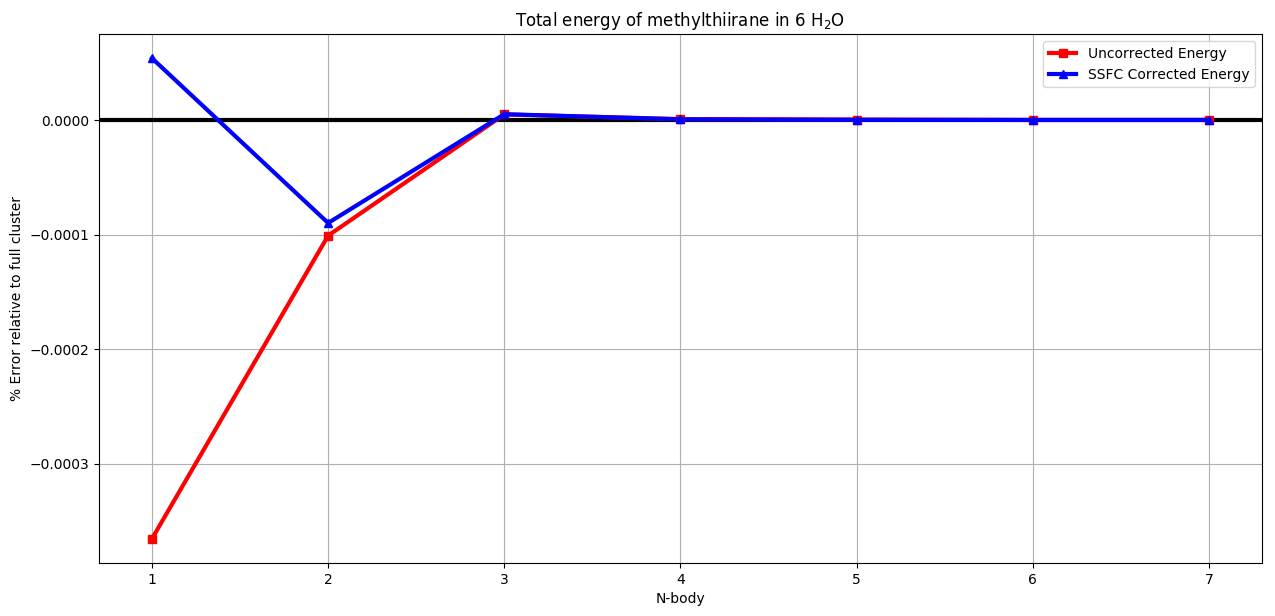

In [64]:
##### GRAPH ENERGY DATA #####
if energy:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    plt.plot(body_list,energy_error_list,'r-s',label='Uncorrected Energy',linewidth=3)
    plt.plot(body_list,ssfc_energy_error_list,'b-^',label='SSFC Corrected Energy',linewidth=3)
    #plt.axis([0.5,max_n+0.5,-0.00025,0.0045])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Total energy of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/energy.png', transparent=True)
    plt.show()

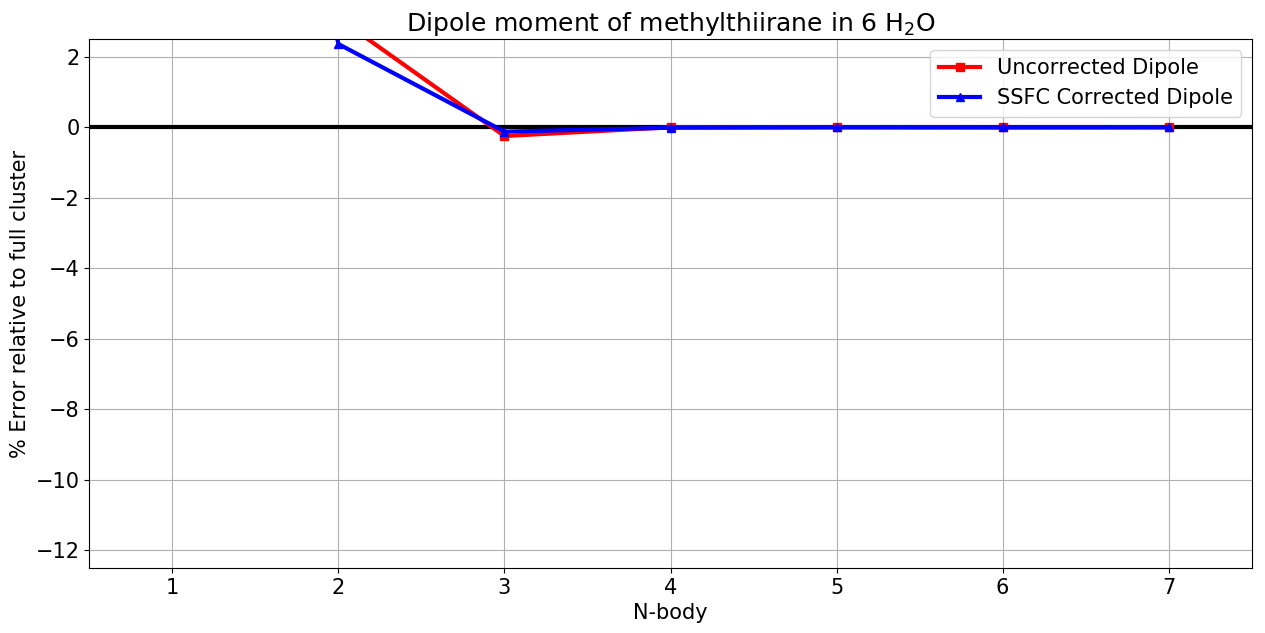

In [65]:
##### GRAPH DIPOLE DATA #####
if dipole:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    plt.plot(body_list,dip_error_list,'r-s',label='Uncorrected Dipole',linewidth=3)
    plt.plot(body_list,ssfc_dip_error_list,'b-^',label='SSFC Corrected Dipole',linewidth=3)
    plt.axis([0.5,max_n+0.5,-12.5,2.5])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Dipole moment of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/dipole.png', transparent=True)
    plt.show()

In [66]:
##### GRAPH MBE POLARIZABILITY DATA #####
if polarizability:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        plt.plot(body_list,tot_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,max_n,-20,20])
    #plt.axis([0.5,max_n+0.5,-100,100])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Polarizability of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/polarizability.png', transparent=True)
    plt.show()

In [67]:
##### GRAPH SSFC POLARIZABILITY DATA #####
if polarizability:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        plt.plot(body_list,tot_ssfc_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,max_n,-20,20])
    #plt.axis([0.5,max_n+0.5,-100,100])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Polarizability of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/polarizability_ssfc.png', transparent=True)
    plt.show()

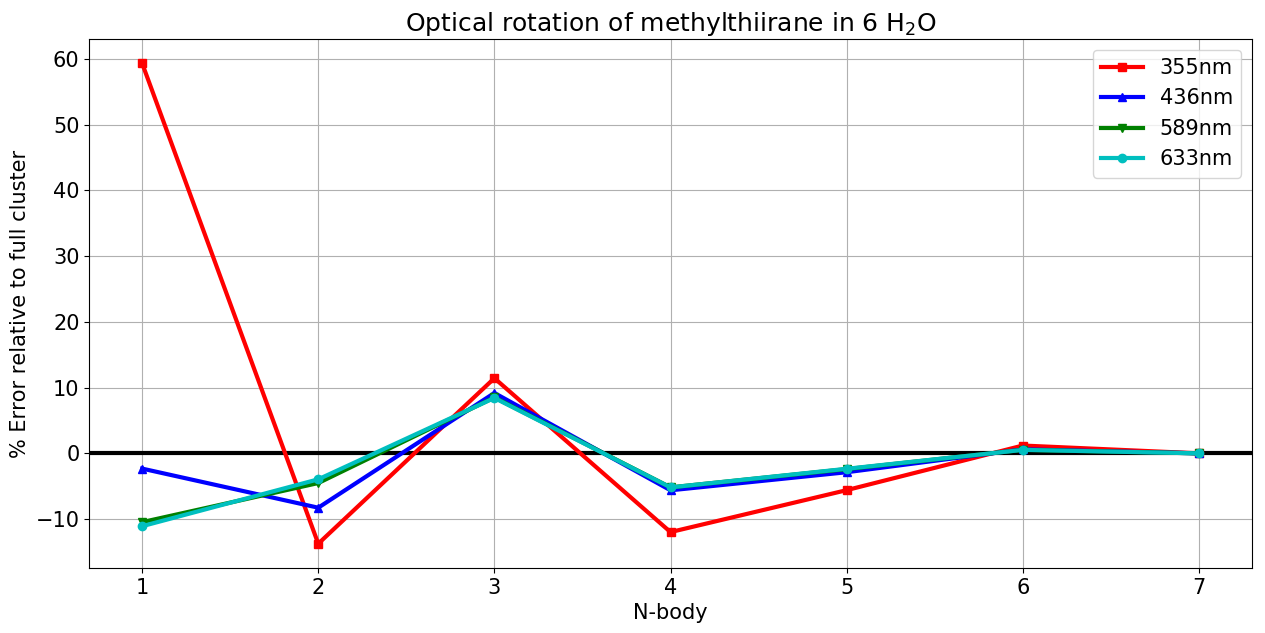

In [68]:
##### GRAPH MBE ROTATION DATA #####
if rotation:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        plt.plot(body_list,tot_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,max_n,-20,20])
    #plt.axis([0.5,max_n+0.5,-100,100])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Optical rotation of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation', transparent=True)
    plt.show()

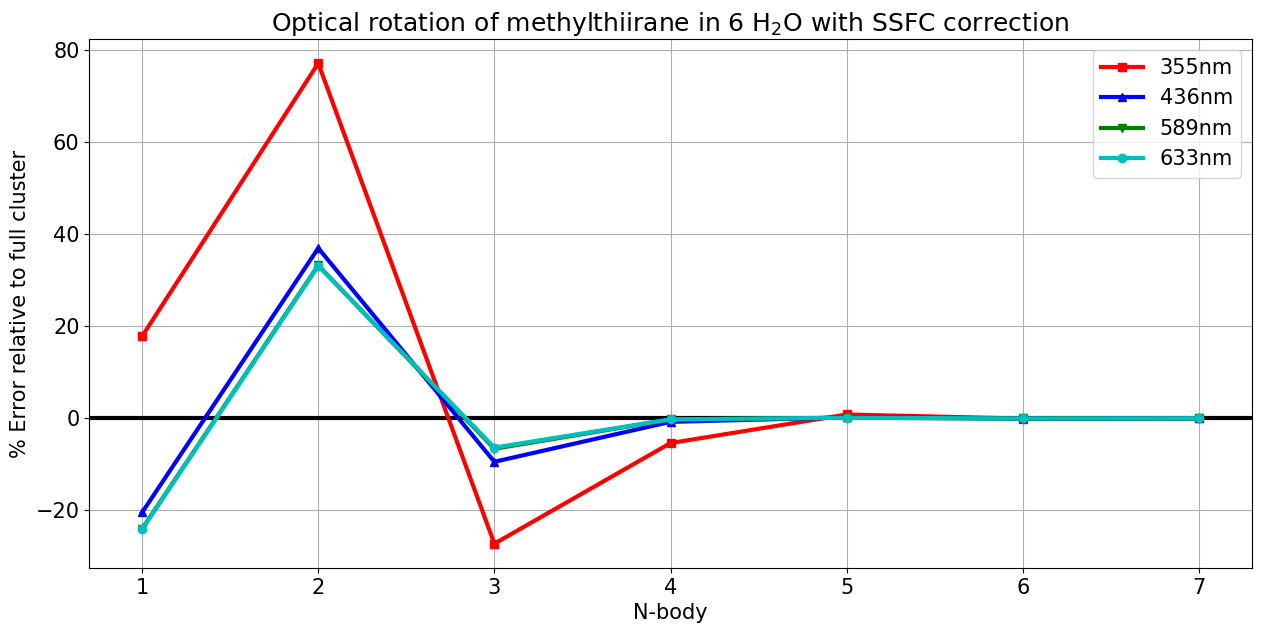

In [69]:
##### GRAPH SSFC ROTATION DATA #####
if rotation:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        plt.plot(body_list,tot_ssfc_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,max_n,-20,20])
    #plt.axis([0.5,max_n+0.5,-100,100])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Optical rotation of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation_ssfc.png', transparent=True)
    plt.show()

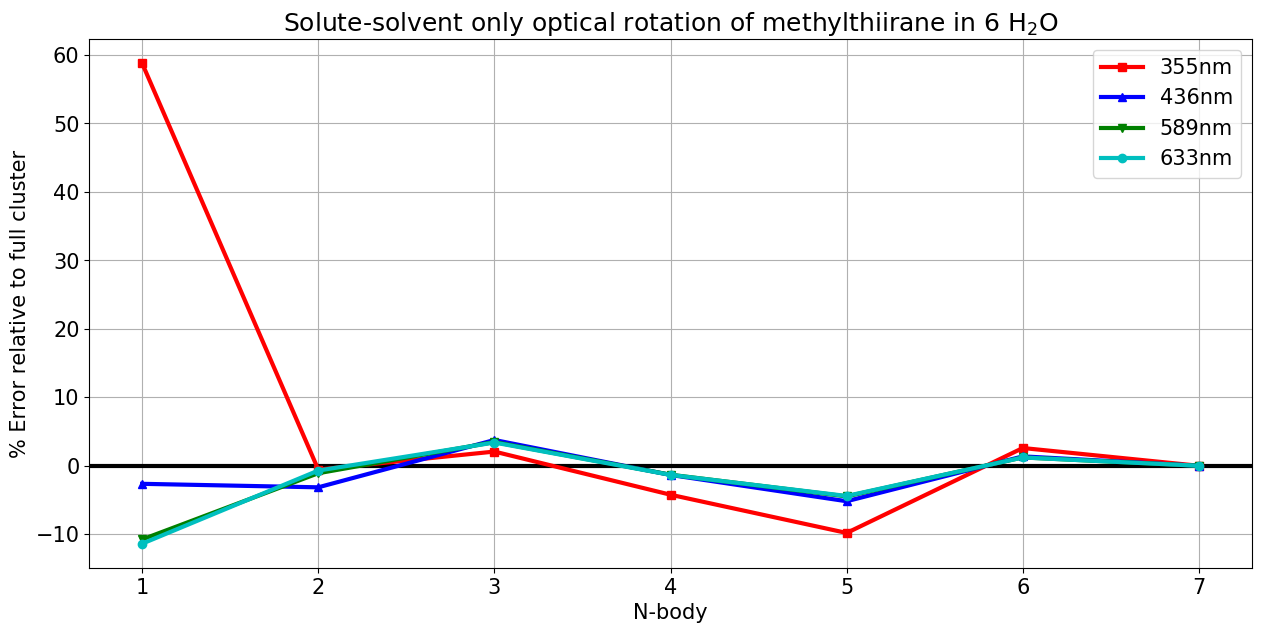

In [70]:
##### GRAPH MBE SOLUTE ROTATION DATA #####
if solute_rotation: 
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        plt.plot(body_list,slt_tot_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,max_n,-20,20])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Solute-solvent only optical rotation of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation_solute.png', transparent=True)
    plt.show()

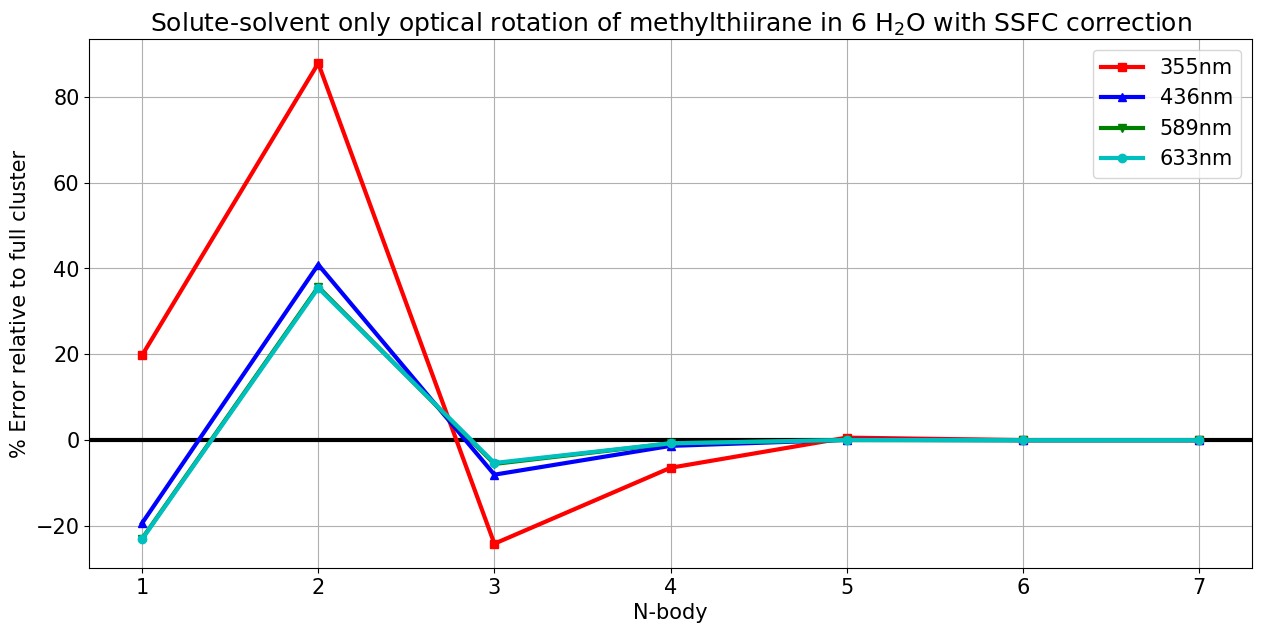

In [71]:
##### GRAPH SSFC SOLUTE ROTATION DATA #####
if solute_rotation:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        plt.plot(body_list,slt_tot_ssfc_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,max_n,-20,20])
    plt.xlabel('N-body')
    plt.ylabel('% Error relative to full cluster')
    plt.title("Solute-solvent only optical rotation of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation_solute_ssfc.png', transparent=True)
    plt.show()

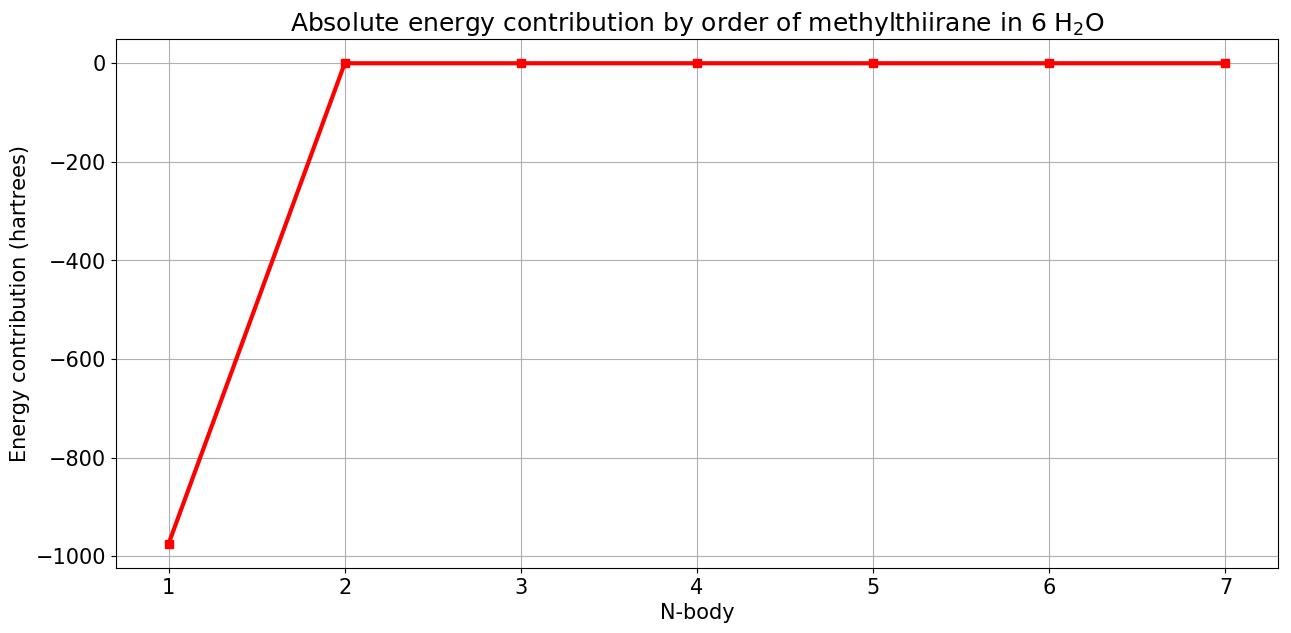

In [72]:
##### GRAPH ENERGY CONTRIBUTION DATA #####
if energy:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    plt.plot(body_list,abs_body_energy_list,'r-s',linewidth=3)
    #plt.axis([1,8,-0.0005,0.005])
    plt.xlabel('N-body')
    plt.ylabel('Energy contribution (hartrees)')
    plt.title("Absolute energy contribution by order of {} in {} H$_2$O".format(full_mol,n_solv))
    #plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/energy_contrib.png', transparent=True)
    plt.show()

In [73]:
##### GRAPH POLARIZABILITY CONTRIBUTION DATA #####
if polarizability:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    for omega in range(0,n_omega):
        plt.plot(body_list,abs_body_pol_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.plot(body_list,[0,0,0,0,0,0,0,0])
    #plt.axis([1,7,-20,10])
    #plt.axis([1,8,-10,65])
    #plt.axis([1,7,-650,650])
    plt.xlabel('N-body')
    plt.ylabel('Polarizability contribution (A.U.))')
    plt.title("Polarizability contribution by order of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/polarizability_contrib.png', transparent=True)
    plt.show()

In [74]:
##### GRAPH POLARIZABILITY CONTRIBUTION DATA WITH SSFC #####
if polarizability:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    for omega in range(0,n_omega):
        plt.plot(body_list,abs_ssfc_body_pol_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,7,-650,650])
    plt.xlabel('N-body')
    plt.ylabel('Polarizability contribution (A.U.)')
    plt.title("Polarizability contribution by order of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/polarizability_contrub_ssfc.png', transparent=True)
    plt.show()

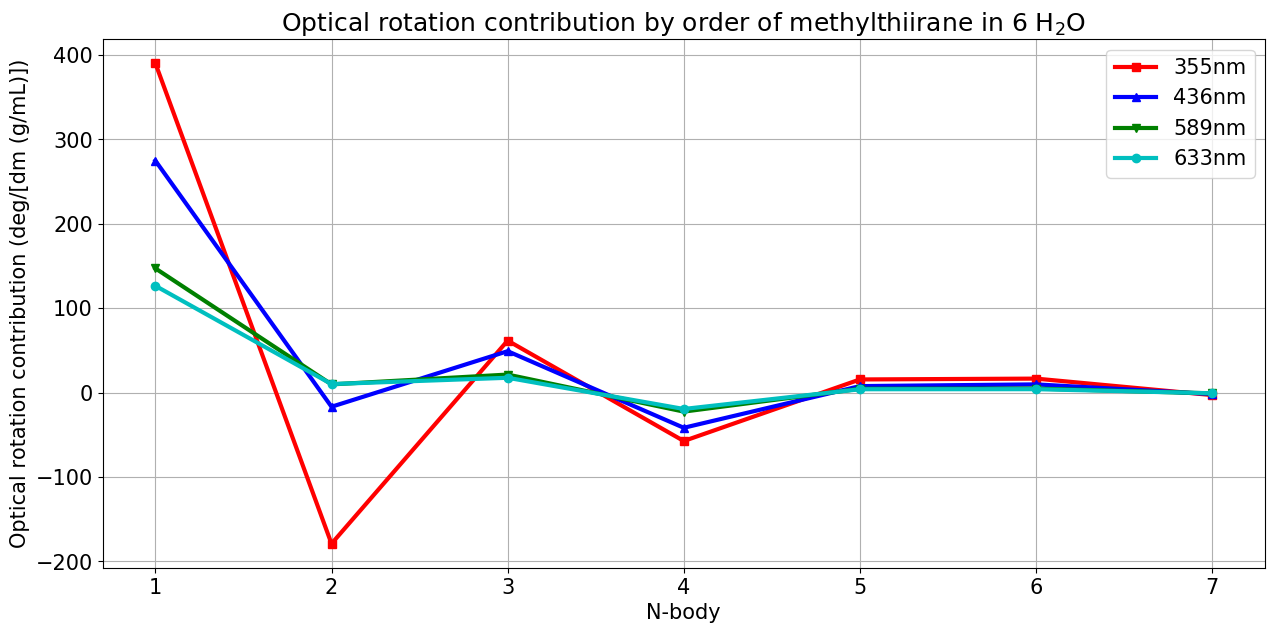

In [75]:
##### GRAPH ROTATION CONTRIBUTION DATA #####
if rotation:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    for omega in range(0,n_omega):
        plt.plot(body_list,abs_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.plot(body_list,[0,0,0,0,0,0,0,0])
    #plt.axis([1,7,-20,10])
    #plt.axis([1,8,-10,65])
    #plt.axis([1,7,-650,650])
    plt.xlabel('N-body')
    plt.ylabel('Optical rotation contribution (deg/[dm (g/mL)])')
    plt.title("Optical rotation contribution by order of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation_contrib.png', transparent=True)
    plt.show()

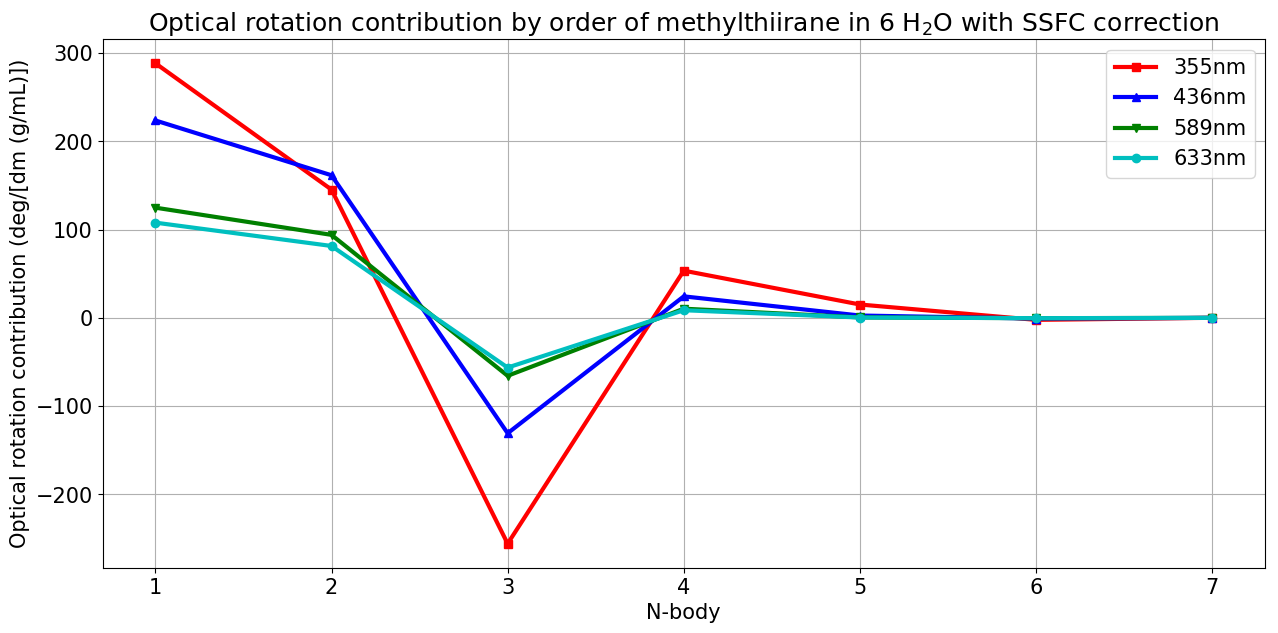

In [76]:
##### GRAPH ROTATION CONTRIBUTION DATA WITH SSFC #####
if rotation:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    for omega in range(0,n_omega):
        plt.plot(body_list,abs_ssfc_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,7,-650,650])
    plt.xlabel('N-body')
    plt.ylabel('Optical rotation contribution (deg/[dm (g/mL)])')
    plt.title("Optical rotation contribution by order of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation_contrub_ssfc.png', transparent=True)
    plt.show()

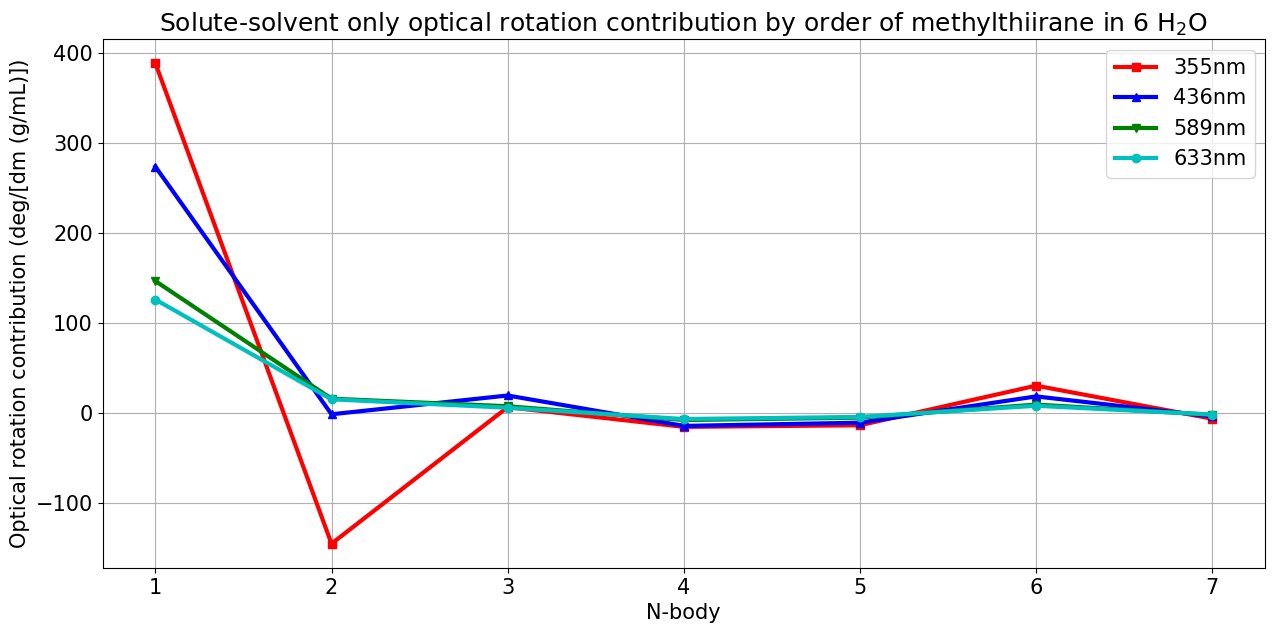

In [77]:
##### GRAPH SOLUTE-SOLVENT CONTRIBUTION DATA #####
if solute_rotation:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    for omega in range(0,n_omega):
        plt.plot(body_list,abs_frag_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.plot(body_list,[0,0,0,0,0,0,0,0])
    #plt.axis([1,7,-20,10])
    #plt.axis([1,8,-10,65])
    #plt.axis([1,7,-650,650])
    plt.xlabel('N-body')
    plt.ylabel('Optical rotation contribution (deg/[dm (g/mL)])')
    plt.title("Solute-solvent only optical rotation contribution by order of {} in {} H$_2$O".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation_contrib_solute.png', transparent=True)
    plt.show()

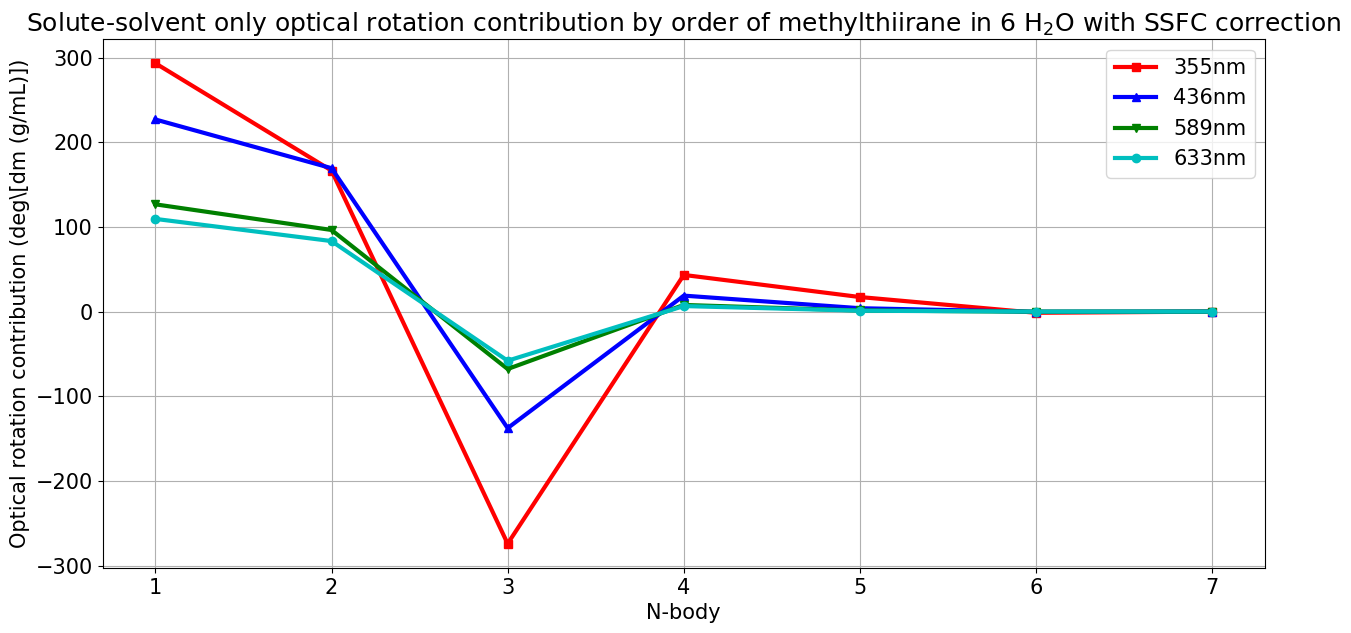

In [78]:
##### GRAPH SOLUTE-SOLVENT CONTRIBUTION DATA WITH SSFC #####
if solute_rotation:
    plt.figure(2,figsize=(15,max_n),dpi=100)
    for omega in range(0,n_omega):
        plt.plot(body_list,abs_frag_ssfc_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    #plt.axis([1,7,-650,650])
    plt.xlabel('N-body')
    plt.ylabel('Optical rotation contribution (deg\[dm (g/mL)])')
    plt.title("Solute-solvent only optical rotation contribution by order of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv))
    plt.legend()
    plt.rc("font",size=15)
    plt.grid()
    plt.savefig('./graphs/rotation_contrib_solute_ssfc.png', transparent=True)
    plt.show()

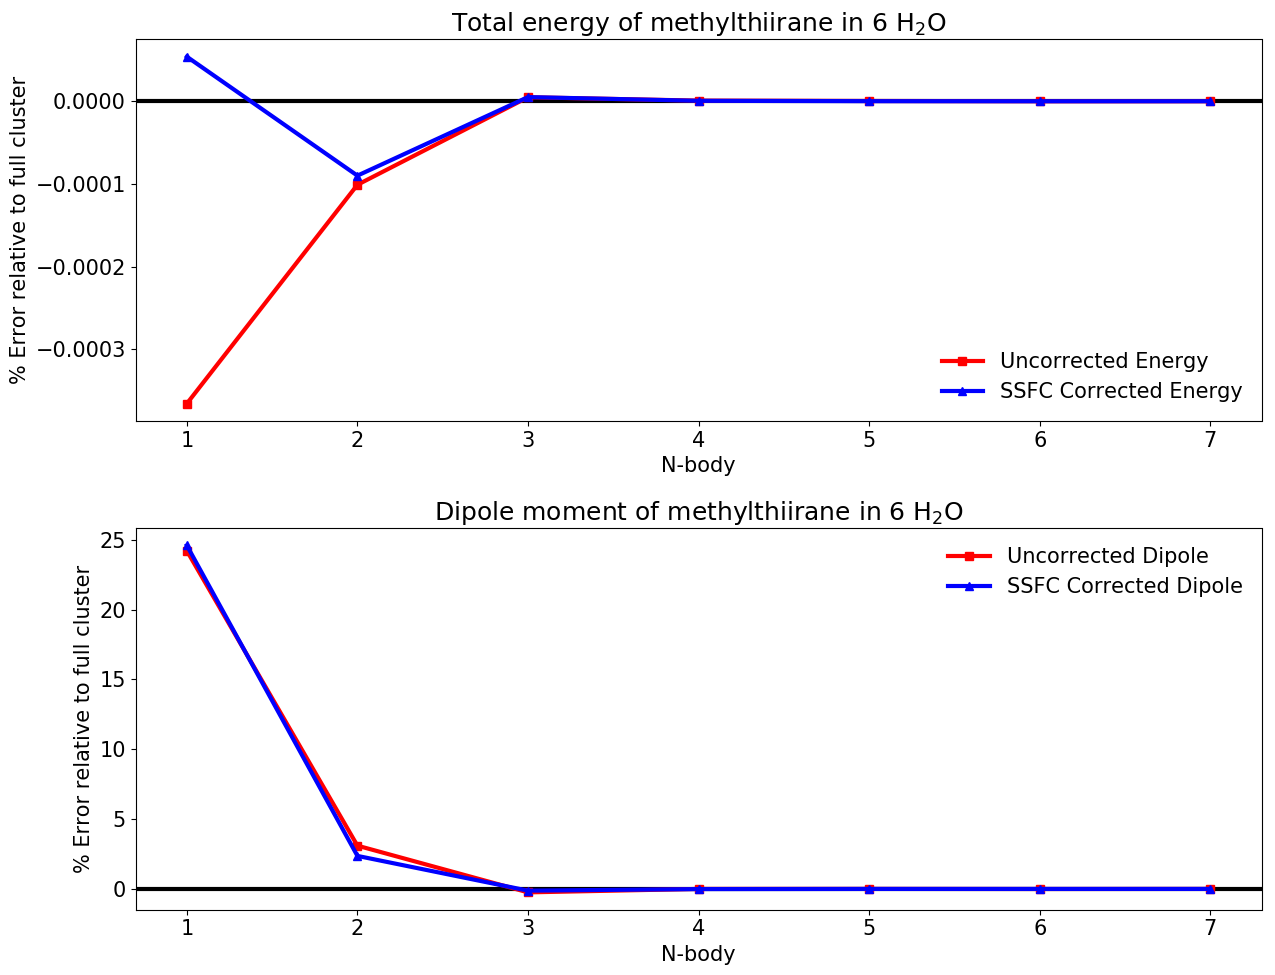

In [79]:
##### GRAPH ENERGY AND DIPOLE DATA TOGETHER #####
if energy and dipole:
    fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), dpi=100)

    ax1.axhline(linewidth=3,color="black")
    ax1.plot(body_list,energy_error_list,'r-s',label='Uncorrected Energy',linewidth=3)
    ax1.plot(body_list,ssfc_energy_error_list,'b-^',label='SSFC Corrected Energy',linewidth=3)
    ax1.set(title="Total energy of {} in {} H$_2$O".format(full_mol,n_solv),ylabel='% Error relative to full cluster',xlabel='N-body')
    #ax1.axis([1,max_n,-0.0001,0.005])
    ax1.legend(framealpha=0)
    #ax1.rc("font",size=15)
    #ax1.grid()

    ax2.axhline(linewidth=3,color="black")
    ax2.plot(body_list,dip_error_list,'r-s',label='Uncorrected Dipole',linewidth=3)
    ax2.plot(body_list,ssfc_dip_error_list,'b-^',label='SSFC Corrected Dipole',linewidth=3)
    ax2.set(title="Dipole moment of {} in {} H$_2$O".format(full_mol,n_solv),ylabel='% Error relative to full cluster',xlabel='N-body')
    #ax2.axis([1,max_n,-13,2])
    ax2.legend(framealpha=0)
    #ax2.grid()
    plt.tight_layout()
    plt.savefig('./graphs/energy_dipole.png', transparent=True)
    plt.show()

In [80]:
##### GRAPH POLARIZABILITY MBE AND SSFC DATA TOGETHER #####
if polarizability:
    fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), dpi=100, sharey=True)
    ax1.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax1.plot(body_list,tot_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax1.set(title="Polarizability",ylabel='% Error',xlabel='N-body')
    #ax1.axis([1.5,max_n+0.5,-100,100])
    ax1.legend(framealpha=0)
    #ax1.rc("font",size=15)
    #ax1.grid()

    ax2.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax2.plot(body_list,tot_ssfc_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax2.set(title="Polarizability with SSFC",ylabel='% Error',xlabel='N-body')
    #ax2.axis([1.5,max_n+0.5,-100,100])
    ax2.legend(framealpha=0)
    #ax2.grid()
    plt.tight_layout()
    plt.savefig('./graphs/polarizability_both.png', transparent=True)
    plt.show()

In [81]:
##### GRAPH POLARIZABILITY CONTRIBUTION MBE AND SSFC DATA TOGETHER #####
if polarizability:
    fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), dpi=100, sharey=True)
    ax1.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax1.plot(body_list,abs_body_pol_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax1.set(title="Polarizability contribution by order",ylabel='Polarizability\n(A.U.)',xlabel='N-body')
    #ax1.axis([1,max_n,-0.0001,0.005])
    ax1.legend(framealpha=0)
    #ax1.rc("font",size=15)
    #ax1.grid()

    ax2.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax2.plot(body_list,abs_ssfc_body_pol_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax2.set(title="Polarizability contribution by order with SSFC",ylabel='Polarizability\n(A.U.)',xlabel='N-body')
    #ax2.axis([1,max_n,-13,2])
    ax2.legend(framealpha=0)
    #ax2.grid()
    plt.tight_layout()
    plt.savefig('./graphs/polarizability_contrib_both.png', transparent=True)
    plt.show()

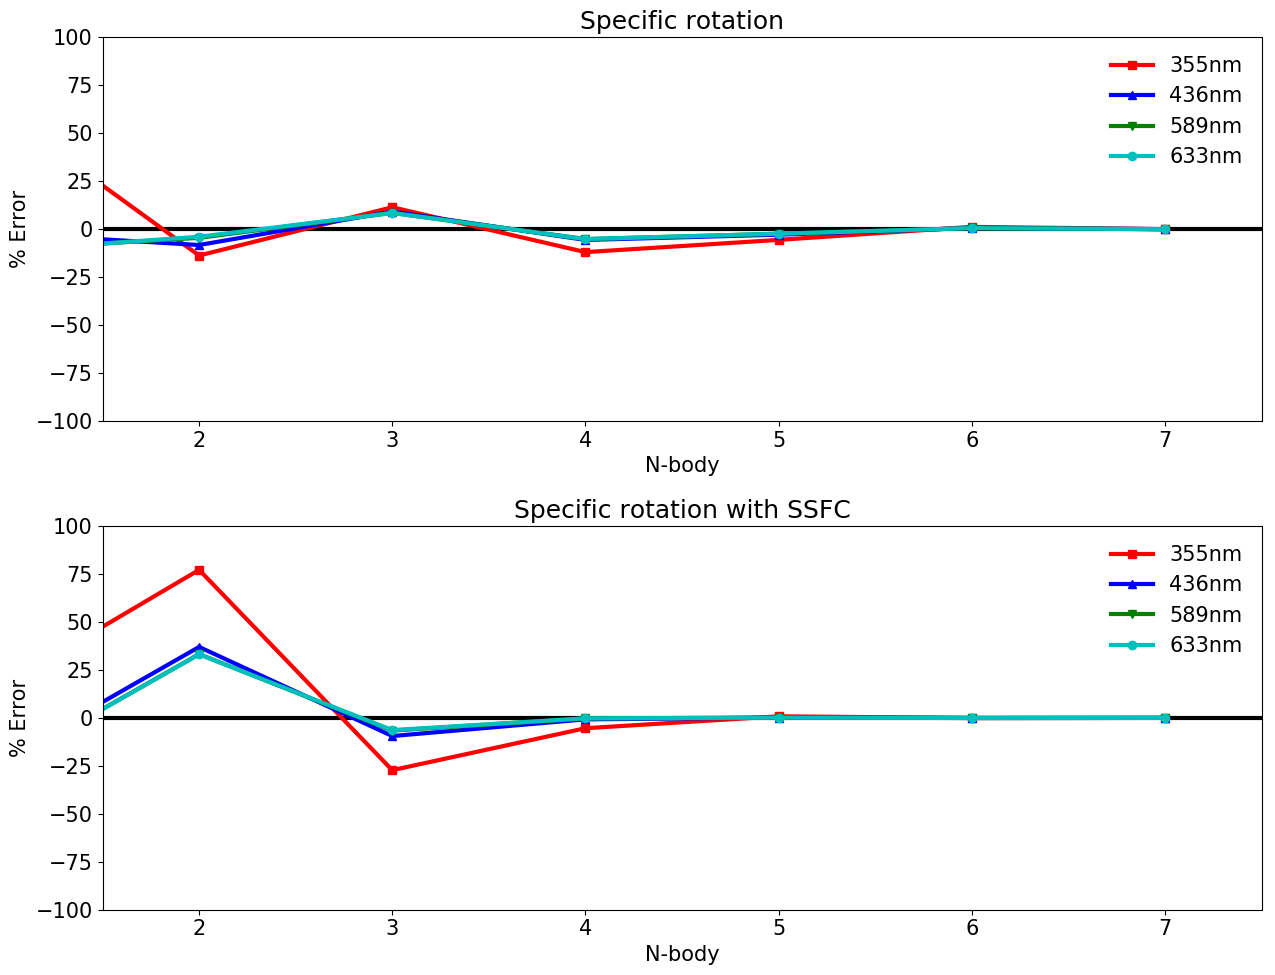

In [82]:
##### GRAPH ROTATION MBE AND SSFC DATA TOGETHER #####
if rotation:
    fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), dpi=100, sharey=True)
    ax1.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax1.plot(body_list,tot_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax1.set(title="Specific rotation",ylabel='% Error',xlabel='N-body')
    ax1.axis([1.5,max_n+0.5,-100,100])
    ax1.legend(framealpha=0)
    #ax1.rc("font",size=15)
    #ax1.grid()

    ax2.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax2.plot(body_list,tot_ssfc_error_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax2.set(title="Specific rotation with SSFC",ylabel='% Error',xlabel='N-body')
    ax2.axis([1.5,max_n+0.5,-100,100])
    ax2.legend(framealpha=0)
    #ax2.grid()
    plt.tight_layout()
    plt.savefig('./graphs/rotation_both.png', transparent=True)
    plt.show()

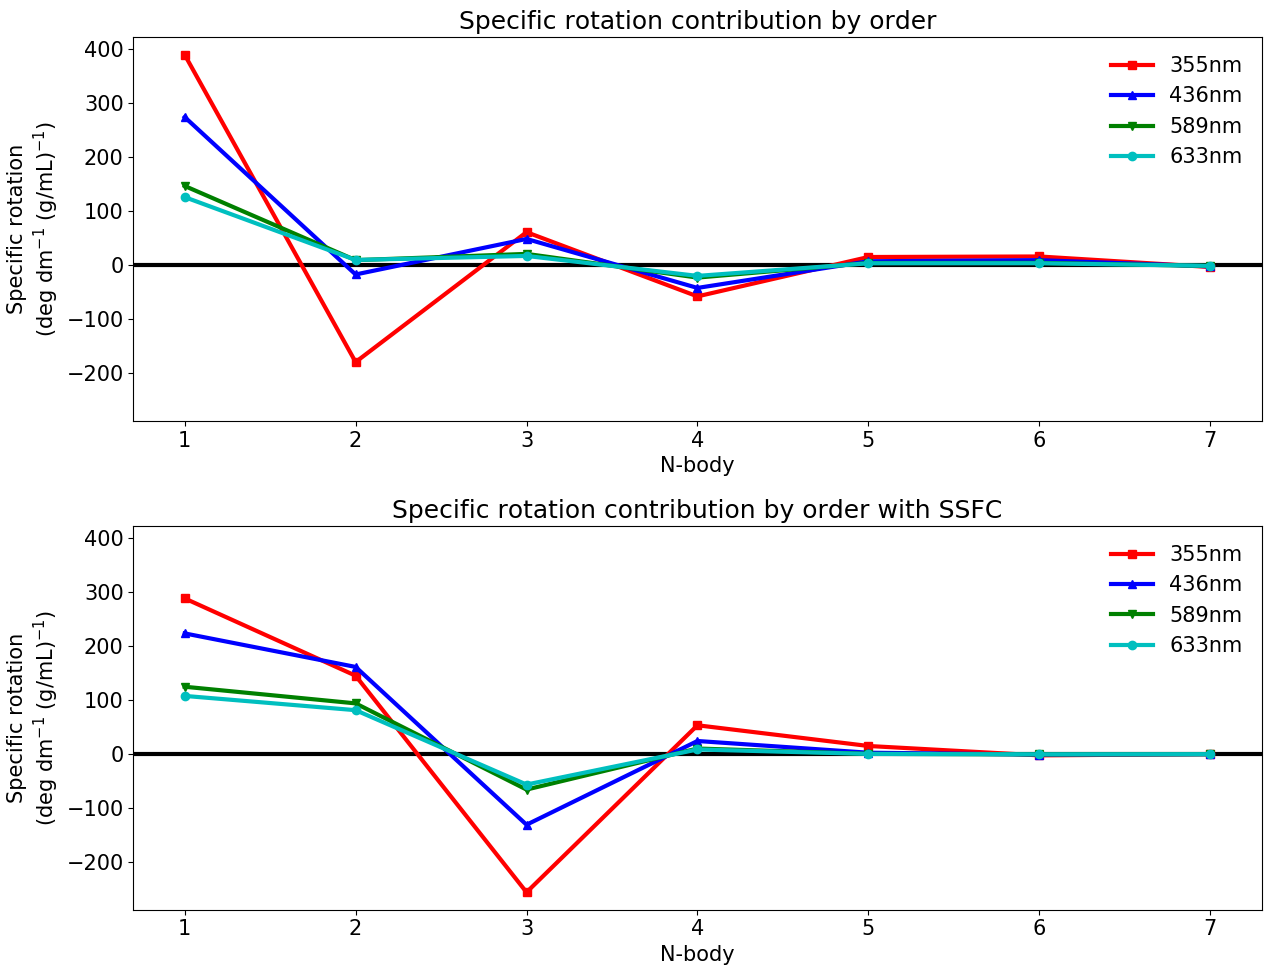

In [83]:
##### GRAPH ROTATION CONTRIBUTION MBE AND SSFC DATA TOGETHER #####
if rotation:
    fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), dpi=100, sharey=True)
    ax1.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax1.plot(body_list,abs_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax1.set(title="Specific rotation contribution by order",ylabel='Specific rotation\n(deg dm$^{-1}$ (g/mL)$^{-1}$)',xlabel='N-body')
    #ax1.axis([1,max_n,-0.0001,0.005])
    ax1.legend(framealpha=0)
    #ax1.rc("font",size=15)
    #ax1.grid()

    ax2.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax2.plot(body_list,abs_ssfc_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax2.set(title="Specific rotation contribution by order with SSFC",ylabel='Specific rotation\n(deg dm$^{-1}$ (g/mL)$^{-1}$)',xlabel='N-body')
    #ax2.axis([1,max_n,-13,2])
    ax2.legend(framealpha=0)
    #ax2.grid()
    plt.tight_layout()
    plt.savefig('./graphs/rotation_contrib_both.png', transparent=True)
    plt.show()



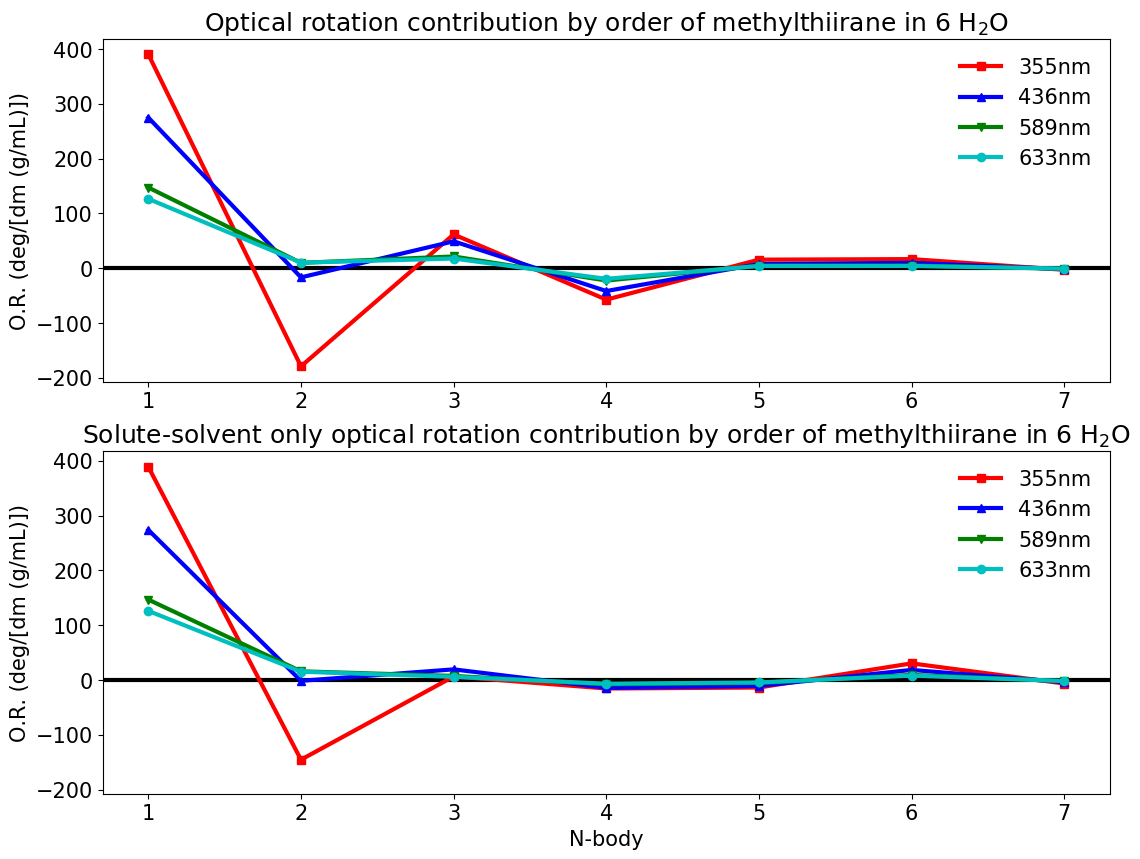

In [84]:
##### GRAPH ROTATION CONTRIBUTION WITH AND WITHOUT SOLVENT DATA TOGETHER #####
if solute_rotation:
    fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), dpi=100, sharey=True)
    ax1.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax1.plot(body_list,abs_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax1.set(title="Optical rotation contribution by order of {} in {} H$_2$O".format(full_mol,n_solv),ylabel='O.R. (deg/[dm (g/mL)])')
    #ax1.axis([1,max_n,-0.0001,0.005])
    ax1.legend(framealpha=0)
    #ax1.rc("font",size=15)
    #ax1.grid()

    ax2.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax2.plot(body_list,abs_frag_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax2.set(title="Solute-solvent only optical rotation contribution by order of {} in {} H$_2$O".format(full_mol,n_solv),ylabel='O.R. (deg/[dm (g/mL)])',xlabel='N-body')
    #ax2.axis([1,max_n,-13,2])
    ax2.legend(framealpha=0)
    #ax2.grid()
    plt.savefig('./graphs/rotation_contrib_solute_solvent.png', transparent=True)
    plt.show()

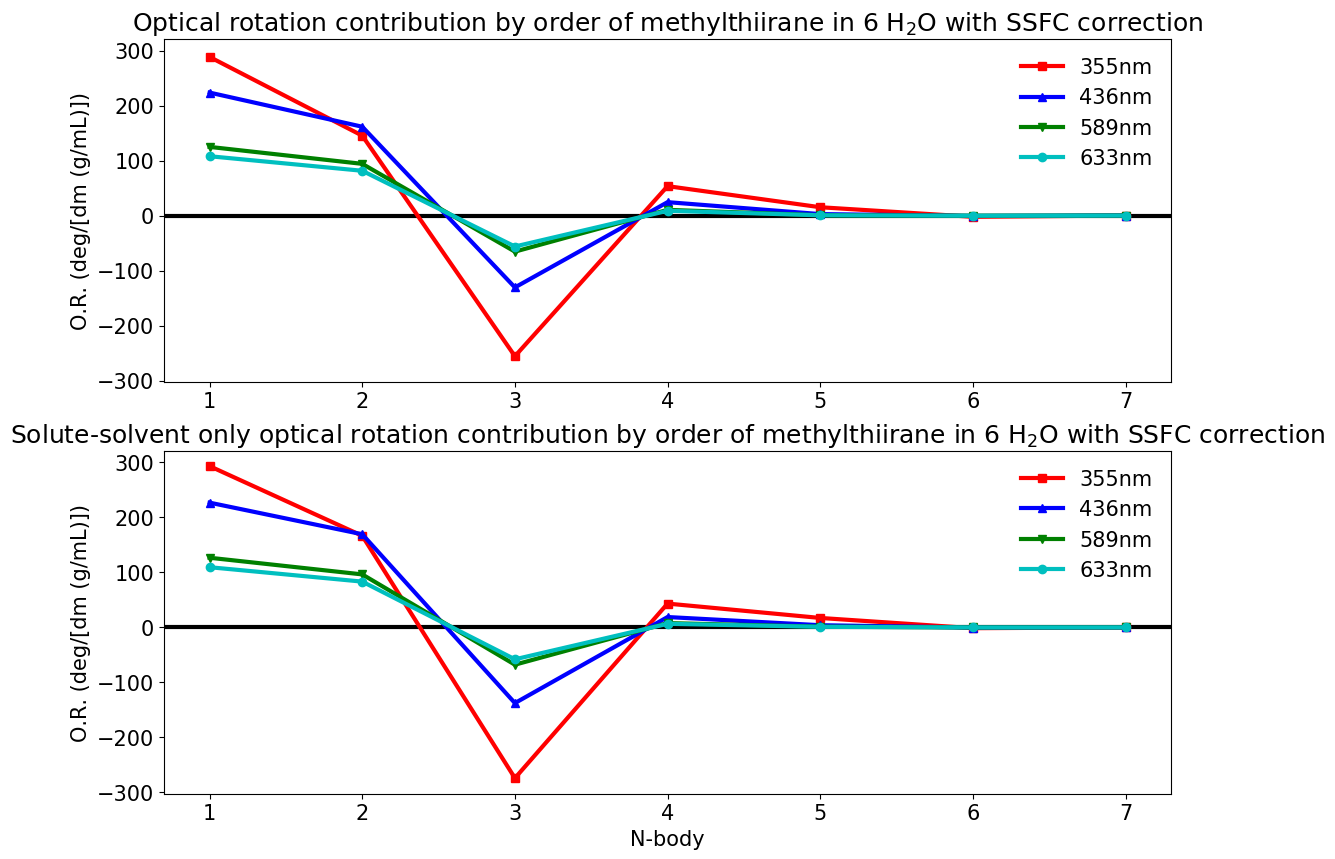

In [85]:
##### GRAPH ROTATION CONTRIBUTION WITH AND WITHOUT SOLVENT WITH SSFC CORRECTION DATA TOGETHER #####
if solute_rotation:
    fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), dpi=100, sharey=True)
    ax1.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax1.plot(body_list,abs_ssfc_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax1.set(title="Optical rotation contribution by order of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv),ylabel='O.R. (deg/[dm (g/mL)])')
    #ax1.axis([1,max_n,-0.0001,0.005])
    ax1.legend(framealpha=0)
    #ax1.rc("font",size=15)
    #ax1.grid()

    ax2.axhline(linewidth=3,color="black")
    for omega in range(0,4):
        ax2.plot(body_list,abs_frag_ssfc_body_rot_list[omega],color_list[omega],label='%dnm'%omega_list[omega],linewidth=3)
    ax2.set(title="Solute-solvent only optical rotation contribution by order of {} in {} H$_2$O with SSFC correction".format(full_mol,n_solv),ylabel='O.R. (deg/[dm (g/mL)])',xlabel='N-body')
    #ax2.axis([1,max_n,-13,2])
    ax2.legend(framealpha=0)
    #ax2.grid()
    plt.savefig('./graphs/rotation_contrib_solute_solvent_ssfc.png', transparent=True)
    plt.show()